# Tendencias categorías

Encontrar tendencia a diferentes niveles

# Librerías

In [1]:
library(ggplot2)
library(readr)
library(dplyr)
library(forcats)
library(zoo)
library(data.table)
library(purrr)
library(timetk)
library(sweep)
library(forecast)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘forcats’ was built under R version 3.5.2”Warning message:
“package ‘zoo’ was built under R version 3.5.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Warning message:
“package ‘data.table’ was built under R version 3.5.2”
Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

Warning message:
“package ‘purrr’ was built under R version 3.5.2”
Attaching package: ‘purrr’

The following object is masked from ‘package:data.table’:

    transpose

Warning message:
“package ‘timetk’ was built under R version 3.5.2”W

# Leer informacion

In [2]:
d1 <- read_tsv("/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_1.txt",
               locale = readr::locale(encoding = "latin1"))

Parsed with column specification:
cols(
  .default = col_character(),
  Tienda = col_double(),
  Articulo = col_double(),
  Megapixeles = col_double()
)
See spec(...) for full column specifications.
Warning message:
“9546 parsing failures.
 row         col               expected actual                                                             file
1185 Megapixeles no trailing characters     MP '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_1.txt'
1787 Megapixeles no trailing characters    MP  '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_1.txt'
2472 Megapixeles no trailing characters    mp  '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_1.txt'
2654 Megapixeles no trailing characters     MP '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_1.txt'
2658 Megapixeles no trailing characters     MP '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_1.txt'
.... ........... ...................... ...... .........................................

In [3]:
d2 <- read_tsv("/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_2.txt",
               locale = readr::locale(encoding = "latin1"))

Parsed with column specification:
cols(
  .default = col_character(),
  `Regin` = col_logical(),
  Distrito = col_logical(),
  Nombre = col_logical(),
  `Tipo Tienda` = col_logical(),
  Tienda = col_double(),
  Articulo = col_double(),
  Megapixeles = col_logical(),
  `Compaia` = col_logical()
)
See spec(...) for full column specifications.
Warning message:
“958 parsing failures.
 row           col           expected actual                                                             file
1662 Megapixeles   1/0/T/F/TRUE/FALSE 13     '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_2.txt'
1663 Megapixeles   1/0/T/F/TRUE/FALSE 13     '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_2.txt'
2532 Compaia 1/0/T/F/TRUE/FALSE Telcel '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_2.txt'
2987 Megapixeles   1/0/T/F/TRUE/FALSE 18     '/Users/darias/Desktop/Tendecias_categorias/prestamos_cel_2.txt'
2991 Compaia 1/0/T/F/TRUE/FALSE AT&T   '/Users/darias/Desktop/Tendeci

In [4]:
data <- rbind(d1,d2)

In [5]:
data <- data.table(data)

In [6]:
names(data) <- c('region','distrito','nombre','tipo_tienda','tienda','prestamo',
                 'estatus_prestamo', 'articulo', 'costo_articulo', 'precio_actual',
                 'rango_prestamo_min', 'rango_prestamo_max', 'descripcion',
                 'category', 'categoria', 'grado', 'marca', 'modelo', 'marca_correcta',
                 'serie', 'mp', 'imei', 'compania', 'fch_trans', 'tienda_adq', 'comp_adq',
                 'tipo_transaccion', 'mes', 'ini', 'anio_fiscal', 'conca')

In [7]:
data %>%
 mutate(fch_trans = as.Date(fch_trans, '%m/%d/%Y')) -> data

In [8]:
data %>%
 mutate(aniomes = paste0(strftime(fch_trans,"%Y"),
                          strftime(fch_trans,"%m")),
        aniomes = as.numeric(as.character(aniomes))) -> data

In [9]:
data %>%
 mutate(costo_articulo = gsub('\\$', '', costo_articulo),
        costo_articulo = gsub('\\.00', '', costo_articulo),
        costo_articulo = gsub(',', '', costo_articulo),
        costo_articulo = as.character(costo_articulo) %>% as.numeric) -> data

# Descriptivos

## Promedio vs Mediana

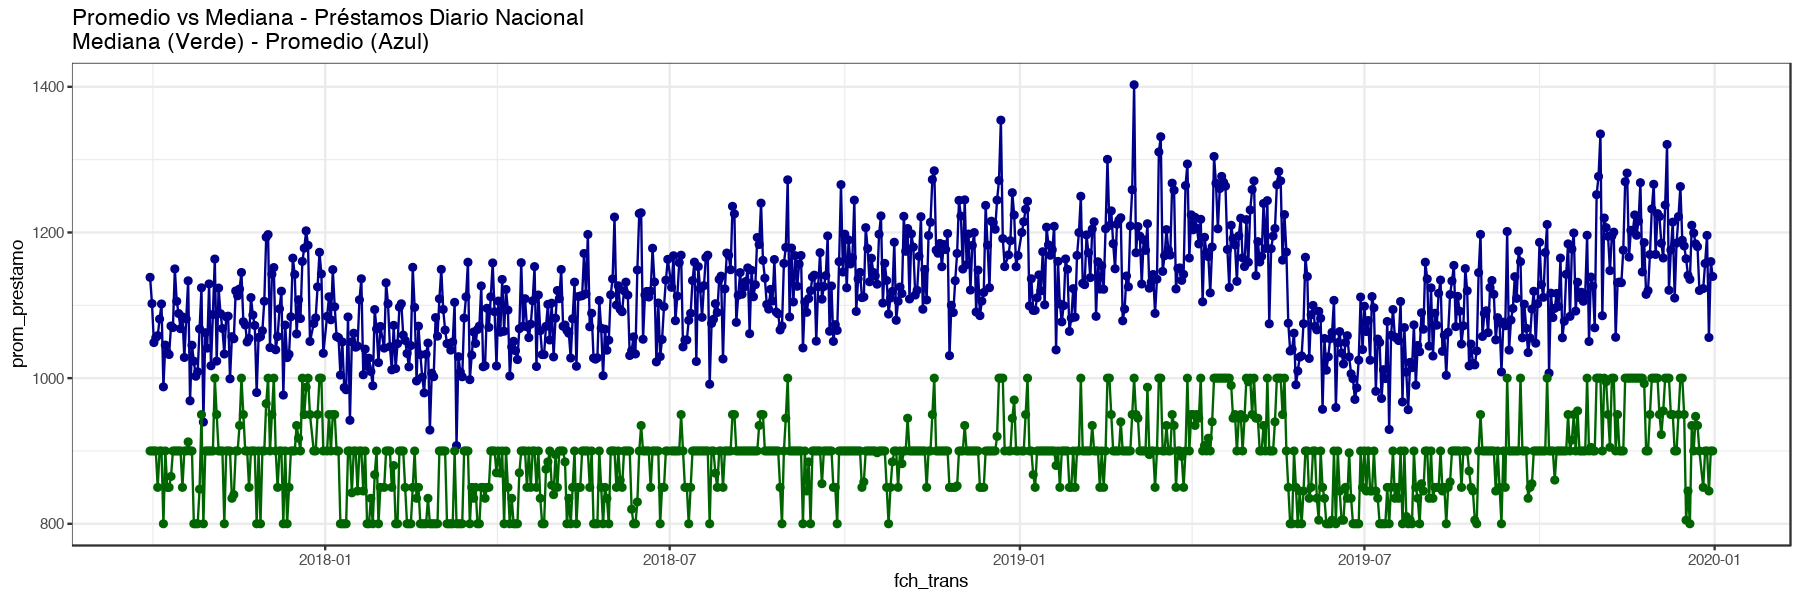

In [53]:
options(repr.plot.width=15, repr.plot.height=5)
data %>%
 group_by(fch_trans) %>%
 summarise(prom_prestamo = mean(costo_articulo, na.rm = TRUE),
           med_prestamo  = median(costo_articulo, na.rm = TRUE)) %>%
 ggplot() +
 geom_line(aes(x = fch_trans, y = prom_prestamo, group = 1), colour = 'darkblue') +
 geom_point(aes(x = fch_trans, y = prom_prestamo), colour = 'darkblue') +
 geom_line(aes(x = fch_trans, y = med_prestamo, group = 1), colour = 'darkgreen') +
 geom_point(aes(x = fch_trans, y = med_prestamo), colour = 'darkgreen') +
 theme_bw() +
 ggtitle('Promedio vs Mediana - Préstamos Diario Nacional\nMediana (Verde) - Promedio (Azul)')

## Ejemplo Outliers

In [55]:
lim_inf <- function(x){
  bp <- boxplot(x, plot = FALSE)
  
  li <- bp$stats[1]
  ls <- bp$stats[5]
  
  return(li)

}

In [56]:
lim_sup <- function(x){
  bp <- boxplot(x, plot = FALSE)
  
  li <- bp$stats[1]
  ls <- bp$stats[5]

  return(ls)

}

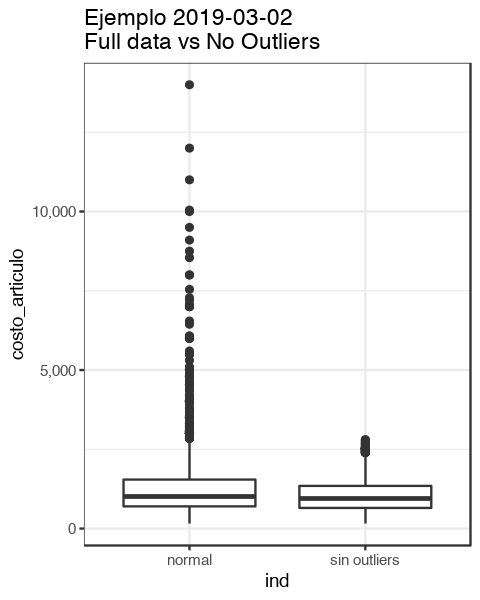

In [67]:
options(repr.plot.width=4, repr.plot.height=5)
data %>%
 filter(fch_trans == '2019-03-02') %>%
 mutate(ind = 'normal') -> d1

data %>%
 filter(fch_trans == '2019-03-02') %>%
 mutate(lim_inf = lim_inf(costo_articulo),
        lim_sup = lim_sup(costo_articulo)) %>%
 filter(costo_articulo >= lim_inf & costo_articulo <= lim_sup) %>%
 select(-lim_inf, -lim_sup) %>%
 mutate(ind = 'sin outliers') -> d2

aux <- rbind(d1,d2)

aux %>%
 ggplot() +
 geom_boxplot(aes(x = ind, y = costo_articulo)) +
 theme_bw() +
 ggtitle('Ejemplo 2019-03-02\nFull data vs No Outliers') +
 scale_y_continuous(labels = scales::comma)

In [70]:
aux %>%
 group_by(ind) %>%
 summarise(promedio = mean(costo_articulo, na.rm = TRUE),
           mediana  = median(costo_articulo, na.rm = TRUE))

ind          promedio mediana
1 normal       1402.821 1000   
2 sin outliers 1049.399  935

## Promedio vs Promedio sin Outliers

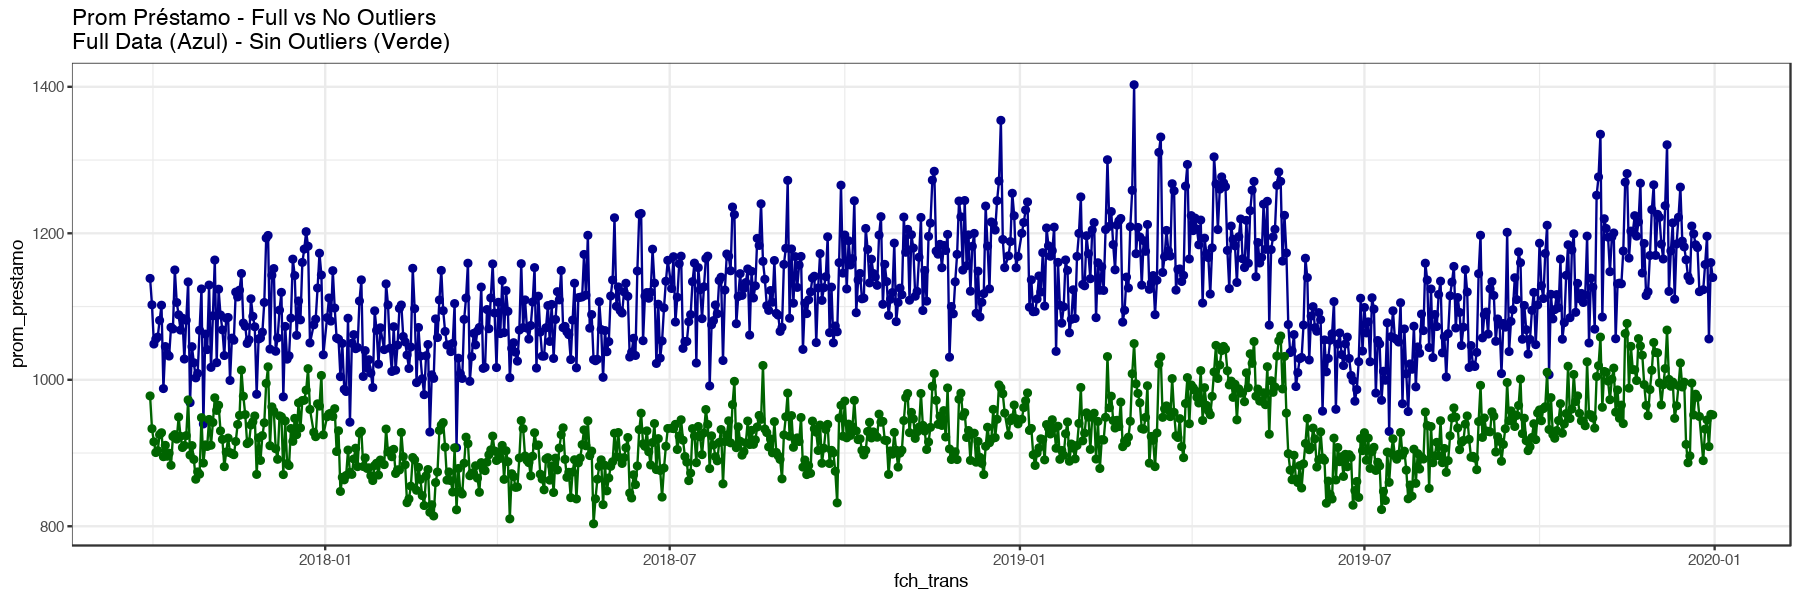

In [72]:
options(repr.plot.width=15, repr.plot.height=5)
data %>%
 group_by(fch_trans) %>%
 mutate(lim_inf = lim_inf(costo_articulo),
        lim_sup = lim_sup(costo_articulo)) %>%
 ungroup %>%
 mutate(costo_articulo_clean = ifelse(costo_articulo >= lim_inf & costo_articulo <= lim_sup,
                                      costo_articulo,
                                      NA)) %>%
 group_by(fch_trans) %>%
 summarise(prom_prestamo = mean(costo_articulo, na.rm = TRUE),
           prom_prestamo_clean = mean(costo_articulo_clean, na.rm = TRUE)) %>%
 ggplot() +
 geom_line(aes(x = fch_trans, y = prom_prestamo, group = 1), colour = 'darkblue') +
 geom_point(aes(x = fch_trans, y = prom_prestamo), colour = 'darkblue') +
 geom_line(aes(x = fch_trans, y = prom_prestamo_clean, group = 1), colour = 'darkgreen') +
 geom_point(aes(x = fch_trans, y = prom_prestamo_clean), colour = 'darkgreen') +
 ggtitle('Prom Préstamo - Full vs No Outliers\nFull Data (Azul) - Sin Outliers (Verde)') +
 theme_bw()

## Promedio vs Promedio sin Outliers vs Mediana

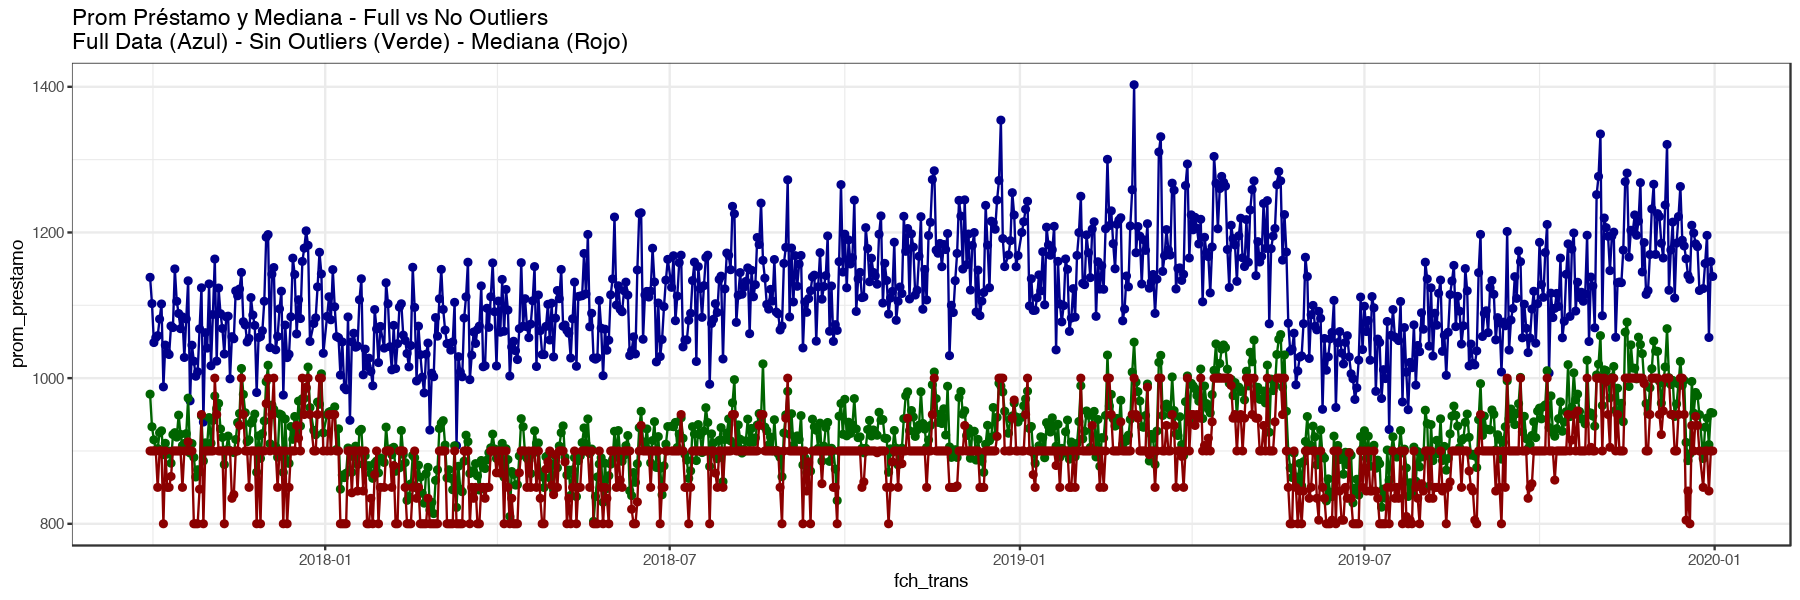

In [77]:
options(repr.plot.width=15, repr.plot.height=5)
data %>%
 group_by(fch_trans) %>%
 mutate(lim_inf = lim_inf(costo_articulo),
        lim_sup = lim_sup(costo_articulo)) %>%
 ungroup %>%
 mutate(costo_articulo_clean = ifelse(costo_articulo >= lim_inf & costo_articulo <= lim_sup,
                                      costo_articulo,
                                      NA)) %>%
 group_by(fch_trans) %>%
 summarise(prom_prestamo = mean(costo_articulo, na.rm = TRUE),
           prom_prestamo_clean = mean(costo_articulo_clean, na.rm = TRUE),
           med_prestamo        = median(costo_articulo, na.rm = TRUE)) %>%
 ggplot() +
 geom_line(aes(x = fch_trans, y = prom_prestamo, group = 1), colour = 'darkblue') +
 geom_point(aes(x = fch_trans, y = prom_prestamo), colour = 'darkblue') +
 geom_line(aes(x = fch_trans, y = prom_prestamo_clean, group = 1), colour = 'darkgreen') +
 geom_point(aes(x = fch_trans, y = prom_prestamo_clean), colour = 'darkgreen') +
 geom_line(aes(x = fch_trans, y = med_prestamo, group = 1), colour = 'darkred') +
 geom_point(aes(x = fch_trans, y = med_prestamo), colour = 'darkred') +
 ggtitle('Prom Préstamo y Mediana - Full vs No Outliers\nFull Data (Azul) - Sin Outliers (Verde) - Mediana (Rojo)') +
 theme_bw()

# Ingeniería de datos

Crear préstamo promedio diario por tienda

In [105]:
data %>%
 group_by(fch_trans, tienda) %>%
 mutate(lim_inf = lim_inf(costo_articulo),
        lim_sup = lim_sup(costo_articulo)) %>%
 filter(costo_articulo >= lim_inf & costo_articulo <= lim_sup) %>%
 group_by(fch_trans, tienda) %>%
 summarise(prom_prestamo = mean(costo_articulo, na.rm = TRUE)) %>%
 arrange(tienda,fch_trans) %>%
 ungroup -> data_agg_day_store

Crear préstamo promedio diario

In [106]:
data %>%
 group_by(fch_trans) %>%
 mutate(lim_inf = lim_inf(costo_articulo),
        lim_sup = lim_sup(costo_articulo)) %>%
 filter(costo_articulo >= lim_inf & costo_articulo <= lim_sup) %>%
 group_by(fch_trans) %>%
 summarise(prom_prestamo = mean(costo_articulo, na.rm = TRUE)) %>%
 arrange(fch_trans) %>%
 ungroup -> data_agg_day

# Estimación Nacional

In [107]:
data_agg_day %>%
 filter(fch_trans <= '2019-12-16') -> data_agg_day_diad

## Autocorrelación

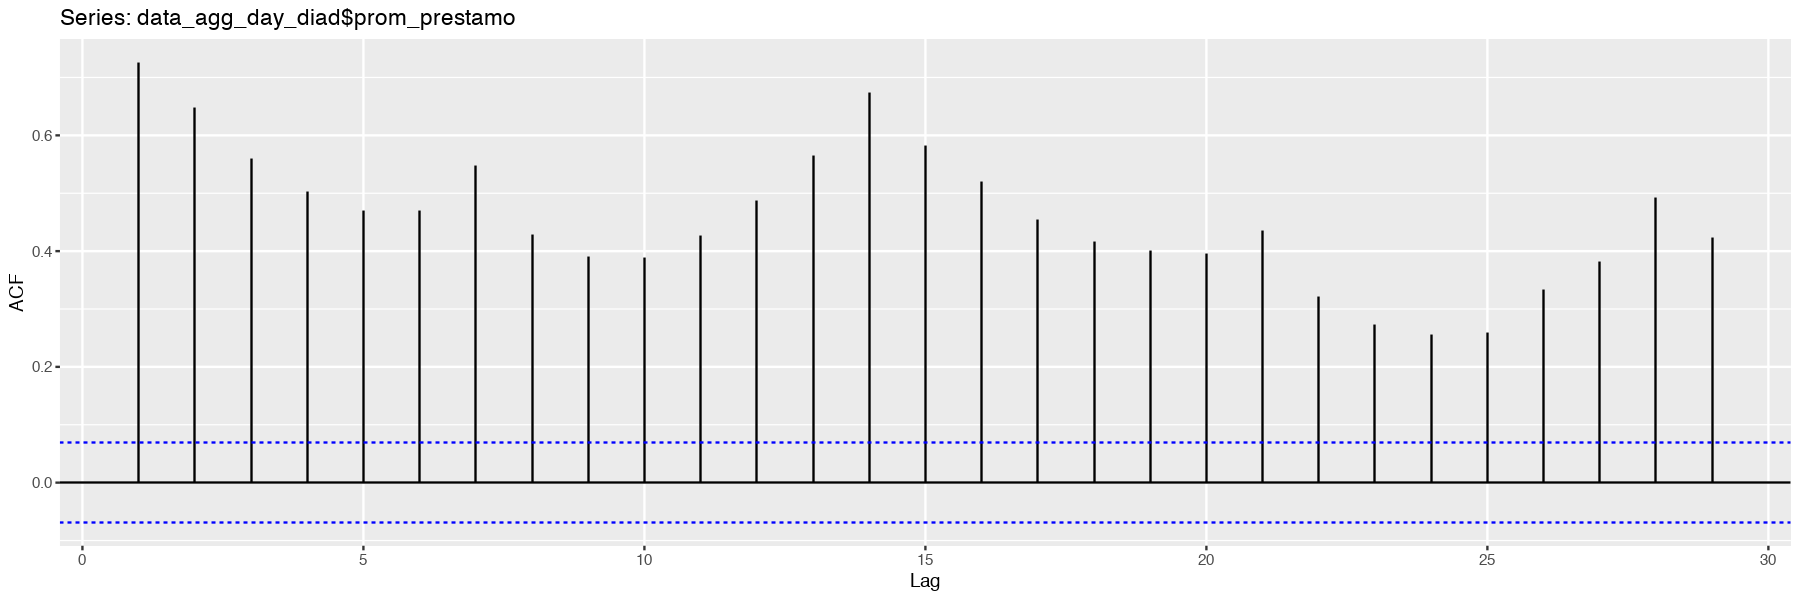

In [108]:
ggAcf(data_agg_day_diad$prom_prestamo)

## ARIMA

## Encontrando el mejor ARIMA

In [163]:
AR <- seq(2,15)
I  <- seq(1,4)
MM <- seq(2,15)

In [164]:
expand.grid(AR,I,MM) %>%
 data.frame() -> ARIMA_pars

names(ARIMA_pars) <- c('AR', 'I', 'MM')

ARIMA_pars$AIC <- NULL

In [165]:
for(i in 1:nrow(ARIMA_pars)){
    fit <- Arima(data_agg_day_diad$prom_prestamo, order=c(ARIMA_pars$AR[i],
                                                          ARIMA_pars$I[i],
                                                          ARIMA_pars$MM[i]))
    
    ARIMA_pars$AIC[i] <- AIC(fit)
}

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [2]


In [173]:
ARIMA_pars %>%
 arrange(AIC) %>%
 head(1) -> best_ARIMA

In [174]:
best_ARIMA

AR I MM AIC    
1 14 1 2  7499.71

In [175]:
ARIMA <- Arima(data_agg_day_diad$prom_prestamo, order=c(best_ARIMA$AR,
                                                        best_ARIMA$I,
                                                        best_ARIMA$MM))

In [177]:
fcst <- forecast(ARIMA, h = 14)

In [178]:
comparisson <- c(data_agg_day_diad$prom_prestamo, fcst %>%
                                                   data.frame %>%
                                                   select(Point.Forecast) %>%
                                                   pull)

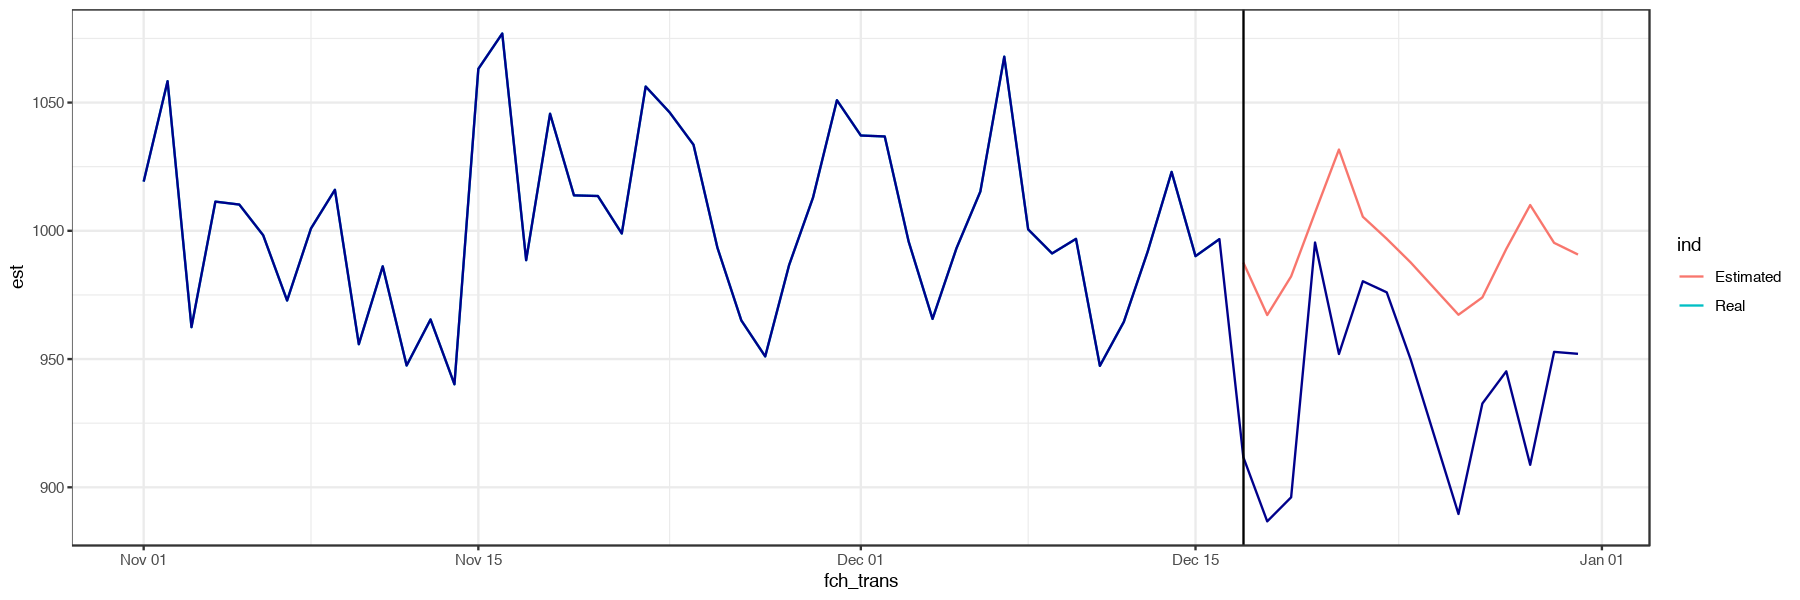

In [179]:
data_agg_day %>%
 mutate(est = comparisson,
        ind = ifelse(fch_trans <= '2019-12-16', 'Real', 'Estimated')) %>%
 filter(fch_trans >= '2019-11-01') %>%
 ggplot() +
 geom_line(aes(x = fch_trans, y = est,           group = ind, colour = ind)) +
 geom_line(aes(x = fch_trans, y = prom_prestamo, group = 1), colour = 'darkblue') +
 geom_vline(xintercept = as.Date('2019-12-17')) +
 theme_bw()